In [2]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("E:\\Jupyter Notebook\\IPL.csv")
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131.0,5.0,133.0,4.0,Kolkata,Wickets,6.0,Umesh Yadav,MS Dhoni,50.0,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177.0,5.0,179.0,6.0,Delhi,Wickets,4.0,Kuldeep Yadav,Ishan Kishan,81.0,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205.0,2.0,208.0,5.0,Punjab,Wickets,5.0,Odean Smith,Faf du Plessis,88.0,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158.0,6.0,161.0,5.0,Gujarat,Wickets,5.0,Mohammed Shami,Deepak Hooda,55.0,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210.0,6.0,149.0,7.0,Rajasthan,Runs,61.0,Sanju Samson,Aiden Markram,57.0,Yuzvendra Chahal,3--22


## Lets start by looking at the number of matches won by each team in IPL 2022

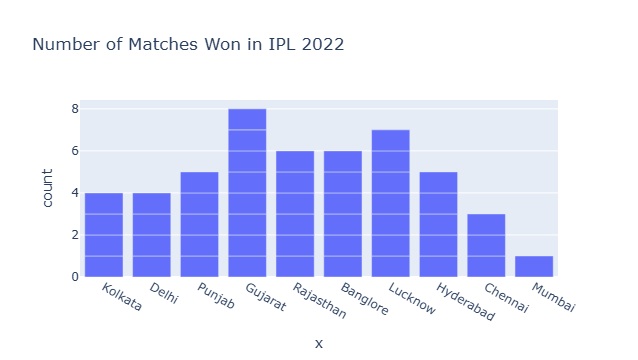

In [5]:
figure = px.bar(data, x=data["match_winner"],title="Number of Matches Won in IPL 2022")
figure.show()

## Now lets see how most of the teams win. Here we will analyze whether most teams win by defending(batting first) or chasing(bowling first).

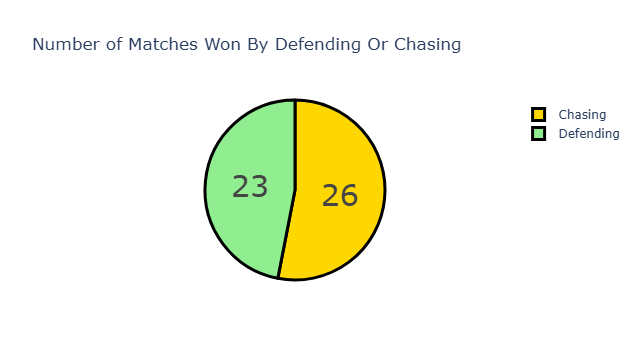

In [6]:
data["won_by"] = data["won_by"].map({"Wickets": "Chasing", 
                                     "Runs": "Defending"})
won_by = data["won_by"].value_counts()
label = won_by.index
counts = won_by.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches Won By Defending Or Chasing')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

## Now let’s see what most teams prefer (batting or fielding) after winning the toss:

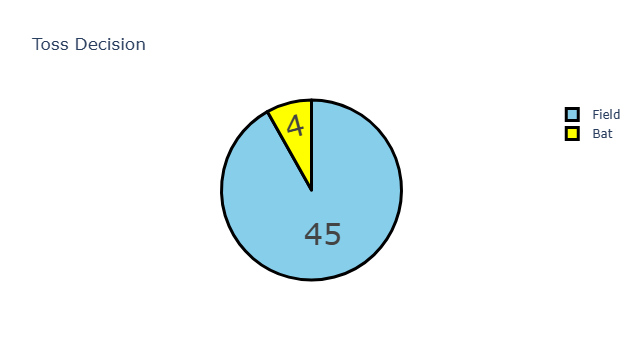

In [7]:
toss = data["toss_decision"].value_counts()
label = toss.index
counts = toss.values
colors = ['skyblue','yellow']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Toss Decision')
fig.update_traces(hoverinfo='label+percent', 
                  textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

## Now let’s see the top scorers of most IPL 2022 matches:

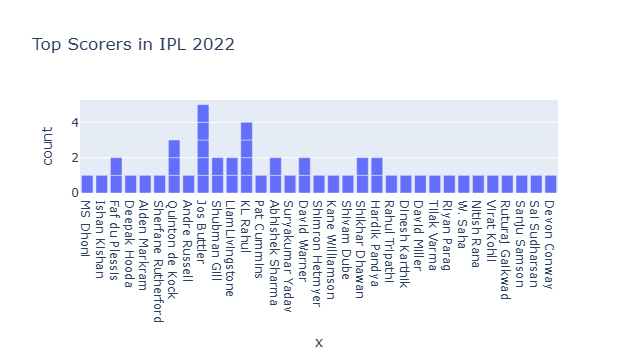

In [8]:

figure = px.bar(data, x=data["top_scorer"],
            title="Top Scorers in IPL 2022")
figure.show()

## Let’s analyze it deeply by including the runs scored by the top scorers:

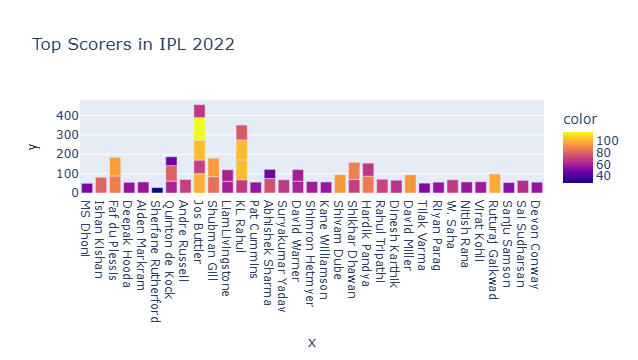

In [9]:
figure = px.bar(data, x=data["top_scorer"], 
                y = data["highscore"], 
                color = data["highscore"],
            title="Top Scorers in IPL 2022")
figure.show()

## Now let’s have a look at the most player of the match awards till now in IPL 2022:

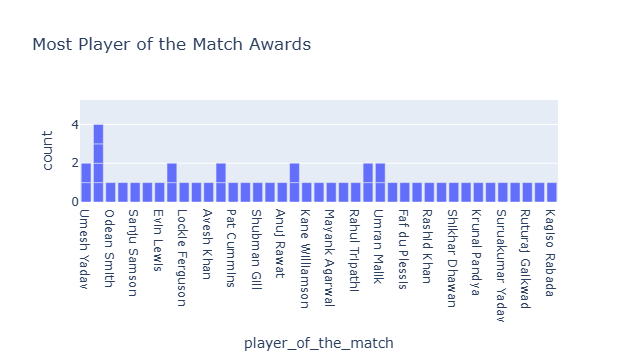

In [10]:

figure = px.bar(data, x='player_of_the_match',title='Most Player of the Match Awards ')
figure.show()


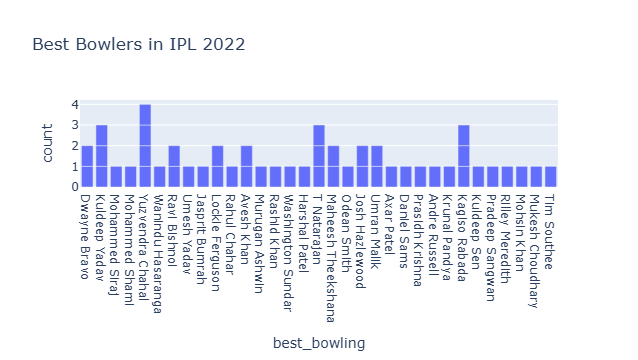

In [11]:

figure = px.bar(data, x = 'best_bowling',title='Best Bowlers in IPL 2022')
figure.show()

## Now let’s have a look at whether most of the wickets fall while setting the target or while chasing the target

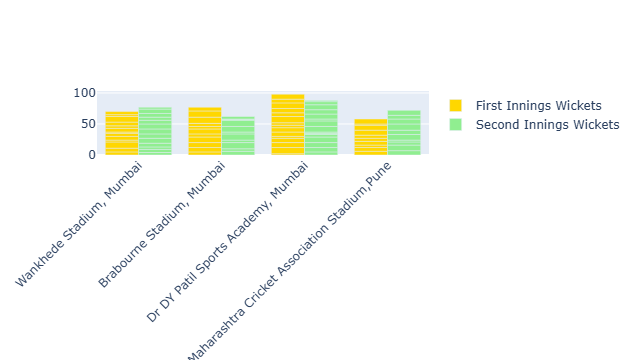

In [12]:
figure = go.Figure()
figure.add_trace(go.Bar(
    x=data["venue"],
    y=data["first_ings_wkts"],
    name='First Innings Wickets',
    marker_color='gold'))

figure.add_trace(go.Bar(
    x=data["venue"],
    y=data["second_ings_wkts"],
    name='Second Innings Wickets',
    marker_color='lightgreen'
))
    
figure.update_layout(barmode='group', xaxis_tickangle=-45)
figure.show()